# **XGBoots (Extreme Gradient Boosting)**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value

## Import Data

In [2]:
df = pd.read_csv("../data/life_expectancy.csv")
df.head()

country  year      status  life_expectancy  adult_mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  alcohol  percentage_expenditure  HepB  measles  ...  Polio  \
0             62     0.01               71.279624  65.0     1154  ...    6.0   
1             64     0.01               73.523582  62.0      492  ...   58.0   
2             66     0.01               73.219243  64.0      430  ...   62.0   
3             69     0.01               78.184215  67.0     2787  ...   67.0   
4             71     0.01                7.097109  68.0     3013  ...   68.0   

   total_expenditure   DPT  HIV_AIDS         GDP  population  thinness_10_19  \
0               8.16  65.0       0.1  584.259210  33736494.0            17.2   
1               8.18  62.0       0.1  612.696514    327582.0            17.5   
2               8.13  64.0       0.1  631.744976  31731688.0            17.7   
3               8.52  67.0       0.1  669.959000   3696958.0            17.9   
4               7.87  68.0       0.1   63.537231   2978599.0            18.2   

   thinness_5_9    HDI  school_year  
0          17.3  0.479         10.1  
1          17.5  0.476         10.0  
2          17.7  0.470          9.9  
3          18.0  0.463          9.8  
4          18.2  0.454          9.5  

[5 rows x 22 columns]

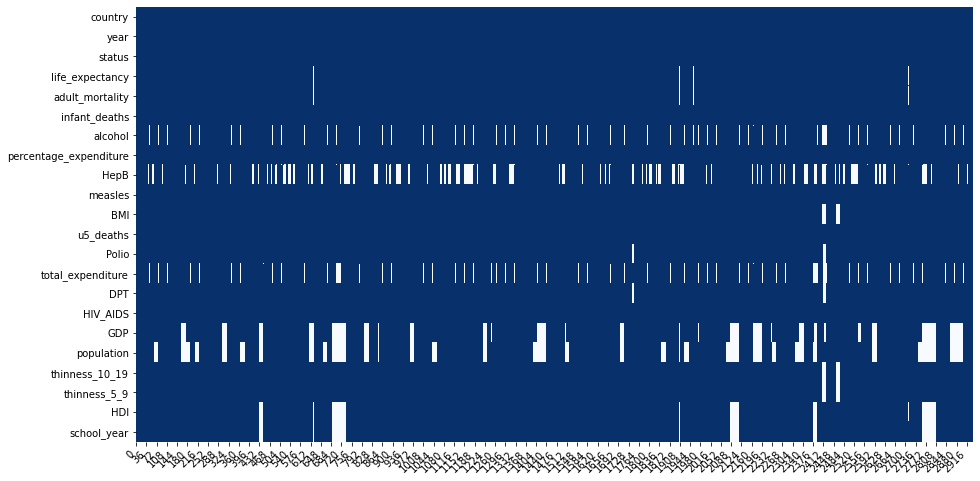

In [3]:
plot_missing_value(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 2938 non-null   object 
 1   year                    2938 non-null   int64  
 2   status                  2938 non-null   object 
 3   life_expectancy         2928 non-null   float64
 4   adult_mortality         2928 non-null   float64
 5   infant_deaths           2938 non-null   int64  
 6   alcohol                 2744 non-null   float64
 7   percentage_expenditure  2938 non-null   float64
 8   HepB                    2385 non-null   float64
 9   measles                 2938 non-null   int64  
 10  BMI                     2904 non-null   float64
 11  u5_deaths               2938 non-null   int64  
 12  Polio                   2919 non-null   float64
 13  total_expenditure       2712 non-null   float64
 14  DPT                     2919 non-null   

In [5]:
df= df[~df["life_expectancy"].isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 2928 non-null   object 
 1   year                    2928 non-null   int64  
 2   status                  2928 non-null   object 
 3   life_expectancy         2928 non-null   float64
 4   adult_mortality         2928 non-null   float64
 5   infant_deaths           2928 non-null   int64  
 6   alcohol                 2735 non-null   float64
 7   percentage_expenditure  2928 non-null   float64
 8   HepB                    2375 non-null   float64
 9   measles                 2928 non-null   int64  
 10  BMI                     2896 non-null   float64
 11  u5_deaths               2928 non-null   int64  
 12  Polio                   2909 non-null   float64
 13  total_expenditure       2702 non-null   float64
 14  DPT                     2909 non-null   

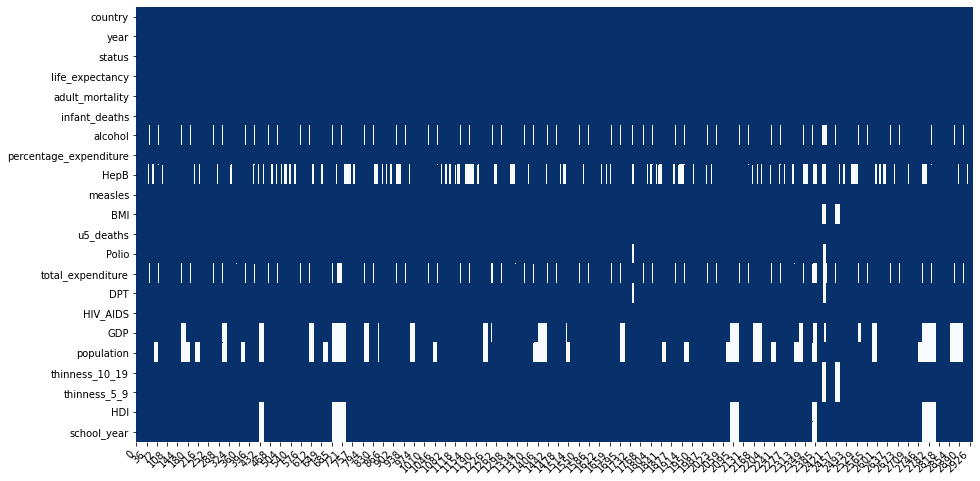

In [6]:
plot_missing_value(df)

## Split Data

In [7]:
X = df.drop(columns=["life_expectancy"])
y = df["life_expectancy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2342, 21), (586, 21), (2342,), (586,))

## Training

In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [9]:
pd.set_option('display.max_columns', None)
X_train.head()

country  year      status  adult_mortality  \
2268                       Serbia  2012  Developing            126.0   
1680                    Mauritius  2002  Developing            179.0   
2785  United Republic of Tanzania  2008  Developing            376.0   
2512                       Sweden  2008   Developed             62.0   
1090                Guinea-Bissau  2015  Developing            275.0   

      infant_deaths  alcohol  percentage_expenditure  HepB  measles   BMI  \
2268              1     9.38              742.510971  97.0        0  58.3   
1680              0     4.14              369.631710  88.0        0  26.4   
2785             92     3.44                0.000000  86.0     3413  19.6   
2512              0     6.90             8105.590882   NaN       25  56.5   
1090              4      NaN                0.000000  87.0      153  26.3   

      u5_deaths  Polio  total_expenditure   DPT  HIV_AIDS           GDP  \
2268          1   93.0               9.89  91.0       0.1   5659.382400   
1680          0   88.0               4.24  88.0       0.1   3957.512960   
2785        138   89.0               4.21  86.0       7.4           NaN   
2512          0   98.0               9.23  98.0       0.1  55746.842380   
1090          6   87.0                NaN  87.0       3.2    596.871719   

      population  thinness_10_19  thinness_5_9    HDI  school_year  
2268    719977.0             2.1           2.1  0.767         14.0  
1680    124621.0             7.9           7.9  0.683         12.5  
2785         NaN             7.3           7.3    NaN          NaN  
2512   9219637.0             1.3           1.3  0.897         15.7  
1090    177526.0             7.1           7.0  0.421          9.2

In [10]:
rsp.xgb_params

{'algo__max_depth': Integer(low=1, high=10),
 'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
 'algo__n_estimators': Integer(low=100, high=200),
 'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
 'algo__gamma': Integer(low=1, high=10),
 'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
 'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
 'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform')}

parameter disini satuan nya rentang bisa diatur manual melalui pakage jcompl.tuning.space
- max depth brp banyak dicions yang mw di buat
- n estimator = berapa banyak pohon yang ingin dibuat
- subsample = berapa baris data yang ingin dimabil satuan persentase
- colsample = berapa colom data yang ingin dimabil satuan persentase dalam rf ini sama dengan max features
- gamma = minimum loss decrease for split to happen inti nya sama dengan minimum sample leaf
- reg_alpha dan reg_lambda inti nya untuk mengurangi overvit

In [11]:
X_train.columns

Index(['country', 'year', 'status', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'HepB', 'measles', 'BMI',
       'u5_deaths', 'Polio', 'total_expenditure', 'DPT', 'HIV_AIDS', 'GDP',
       'population', 'thinness_10_19', 'thinness_5_9', 'HDI', 'school_year'],
      dtype='object')

In [35]:
preprocesor = ColumnTransformer([
    ("numeric", num_pipe(),['year', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'HepB', 'measles', 'BMI',
       'u5_deaths', 'Polio', 'total_expenditure', 'DPT', 'HIV_AIDS', 'GDP',
       'population', 'thinness_10_19', 'thinness_5_9', 'HDI', 'school_year']),
    ("categoric",cat_pipe(encoder='onehot'), ['country','status'])
])

pipeline = Pipeline([
    ("prep", preprocesor),
    ("algo", XGBRegressor(n_jobs=-1, random_state=42))
])

#Tuning
model = RandomizedSearchCV(pipeline,rsp.xgb_params,cv=3, n_iter=1, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train),  model.score(X_test, y_test), model.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{'algo__colsample_bytree': 0.4370861069626263, 'algo__gamma': 8, 'algo__learning_rate': 0.1575132049977973, 'algo__max_depth': 7, 'algo__n_estimators': 182, 'algo__reg_alpha': 0.0025113061677390002, 'algo__reg_lambda': 0.06870614282613305, 'algo__subsample': 0.4668543055695109}
0.9916964653622803 0.9603895336728145 0.9534585681438598


`Kenapa Pake n-iter = 1 klw set 50 lama jalanin nya maklum pc kentang`

# Bayesian Search Teknik Baru
Konsep nya sama seperti game BattleShip `` https://www.youtube.com/watch?v=4gHJlYLomrs ``

In [41]:
from skopt import BayesSearchCV
from jcopml.tuning import bayes_search_params as bsp

In [47]:
preprocesor = ColumnTransformer([
    ("numeric", num_pipe(),['year', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'HepB', 'measles', 'BMI',
       'u5_deaths', 'Polio', 'total_expenditure', 'DPT', 'HIV_AIDS', 'GDP',
       'population', 'thinness_10_19', 'thinness_5_9', 'HDI', 'school_year']),
    ("categoric",cat_pipe(encoder='onehot'), ['country','status'])
])

pipeline = Pipeline([
    ("prep", preprocesor),
    ("algo", XGBRegressor(n_jobs=-1, random_state=42))
])

#Tuning
model = BayesSearchCV(pipeline, bsp.xgb_params, cv=3, n_iter=5, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train),  model.score(X_test, y_test), model.best_score_)

TypeError: __init__() got an unexpected keyword argument 'iid'

sayang nya eror di sklearn terbaru